In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [ ]:
y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [ ]:
def res_net_block(input_data, filters, conv_size):
  x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
  x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
  x = layers.Add()([x, input_data])
  x = layers.Activation('relu')(x)
  return x

In [ ]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='elu')(inputs)
x = layers.Conv2D(32, 3, activation='elu')(x)
x = layers.MaxPooling2D(3)(x)
num_res_net_blocks = 5
filters=32
conv_size=3

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

# x = layers.Conv2D(64, 3, activation='elu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

# x = layers.Conv2D(128, 3, activation='elu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)


x = layers.Conv2D(32, 3, activation='elu')(x)
x = layers.AveragePooling2D(4)(x)
x=layers.Flatten()(x)
x = layers.Dense(256, activation='elu')(x)
outputs = layers.Dense(100, activation='softmax')(x)

res_net_model = keras.Model(inputs, outputs)

In [ ]:
res_net_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 30, 30, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_34[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 32)     0           conv2d_35[0][0]                  
_______________________________________________________________________________________

In [ ]:
%load_ext tensorboard
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='tensorboard',histogram_freq=1)
res_net_model.compile(optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.005)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='resnet_sgd_noreg.hdf5',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
# res_net_model.fit(x_train,y_proc,batch_size=200,validation_data=(x_test,y_test_proc),epochs=50,callbacks=[callback,model_checkpoint_callback])
output=res_net_model.fit_generator(datagen.flow(x_train,y_proc,batch_size = 200), epochs = 100, validation_data = (x_test,y_test_proc),callbacks = [tensor_board,callback,model_checkpoint_callback])

Epoch 1/100
  1/250 [..............................] - ETA: 0s - loss: 4.6115 - acc: 0.0200WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
250/250 [==============================] - 24s 98ms/step - loss: 4.4343 - acc: 0.0285 - val_loss: 4.0714 - val_acc: 0.0715
Epoch 2/100
250/250 [==============================] - 24s 95ms/step - loss: 3.9138 - acc: 0.0889 - val_loss: 3.8455 - val_acc: 0.1020
Epoch 3/100
250/250 [==============================] - 23s 94ms/step - loss: 3.6640 - acc: 0.1293 - val_loss: 3.5985 - val_acc: 0.1409
Epoch 4/100
250/250 [==============================] - 23s 94ms/step - loss: 3.4513 - acc: 0.1643 - val_loss: 3.3488 - val_acc: 0.1867
Epoch 5/100
250/250 [==============================] - 23s 94ms/step - loss: 3.3091 - acc: 0.1928 - val

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
y_pred=res_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))



Precision: 0.5056111296328302
Recall: 0.4725
Accuracy: 0.4725


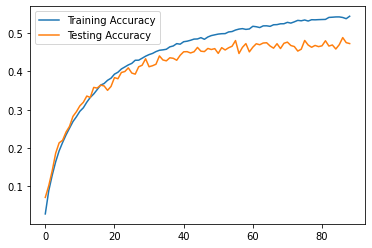

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])

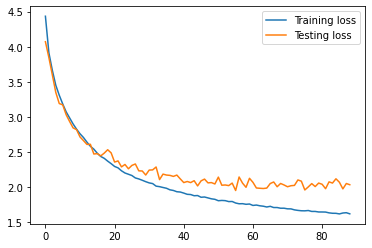

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.legend(['Training loss','Testing loss'])

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='elu')(inputs)
x = layers.Conv2D(32, 3, activation='elu')(x)
x = layers.MaxPooling2D(3)(x)
num_res_net_blocks = 5
filters=32
conv_size=3

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

# x = layers.Conv2D(64, 3, activation='elu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

# x = layers.Conv2D(128, 3, activation='elu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='elu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)


x = layers.Conv2D(32, 3, activation='elu')(x)
x = layers.AveragePooling2D(4)(x)
x=layers.Flatten()(x)
x = layers.Dense(256, activation='elu')(x)
outputs = layers.Dense(100, activation='softmax')(x)

res_net_model = keras.Model(inputs, outputs)

res_net_model.load_weights('../weights/resnet_sgd_noreg.hdf5')

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
y_pred=res_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))



169009152/169001437 [==============================] - 4s 0us/step
Precision: 0.503263655096167
Recall: 0.4881
Accuracy: 0.4881
